In [16]:
#auto reload 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
from snake_env import SnakeEnv
import mediapy as media
import pygame
import numpy as np

""

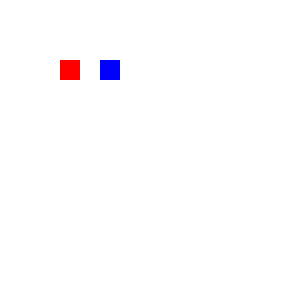

In [18]:

snakie.render_mode = "rgb_array"
snakie.reset()
media.show_image(snakie.render())

In [40]:
n_exp = 10
expert_exp = {"reward": [], "action": [], "observation": [], "terminal": [], "next_state": []}
snakie = SnakeEnv({"render_mode": "human"})
pygame.time.wait(1000)
for experience in range(n_exp):
    #run forever and take actions from keyboard and collect data about the reward

    expert_exp["observation"].append(snakie.reset())
    done = False
    action = 0 
    while not done:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                pygame.quit()
            if event.type == pygame.KEYDOWN:
                if event.key == pygame.K_LEFT:
                    action = 2
                elif event.key == pygame.K_RIGHT:
                    action = 3
                elif event.key == pygame.K_UP:
                    action = 0
                elif event.key == pygame.K_DOWN:
                    action = 1
        probs = np.zeros(4)
        probs[action] = 1
        obs,reward,done,_,_ = snakie.step(probs)
        expert_exp["reward"].append(reward)
        expert_exp["action"].append(action)
        expert_exp["observation"].append(obs)
        expert_exp["terminal"].append(done)
        expert_exp["next_state"].append(obs)
        snakie.render("human")
        pygame.time.wait(10)

expert_exp["observation"] = expert_exp["observation"][:-1]

error: display Surface quit